In [1]:
import numpy as np
from scipy.stats import chi2
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Generation

In [15]:
n = 1000
p = 14
k = 6

X = np.random.randn(n, p)
chisq_median = chi2.median(k)
y = (np.pow(X[:, :k], 2).sum(axis=1) > chisq_median).astype(int)

In [16]:
X = np.random.randn(n, p)
y = (np.abs(X[:, :k]).sum(axis=1) > k).astype(int)

## Comparision

Text(0.5, 1.0, 'Impurity based feature importance for k=6')

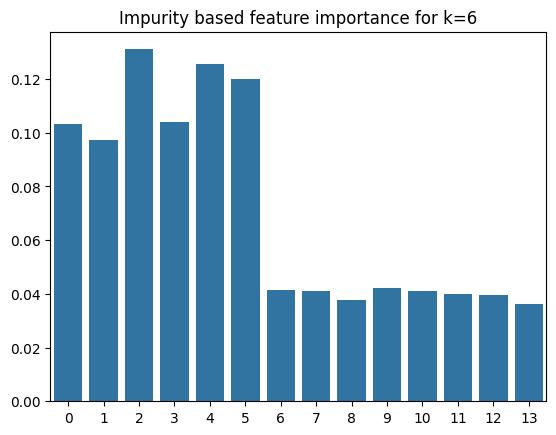

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

sns.barplot(rf.feature_importances_)
plt.title(f'Impurity based feature importance for k={k}')

Text(0.5, 1.0, 'Permutation based feature importance for k=6')

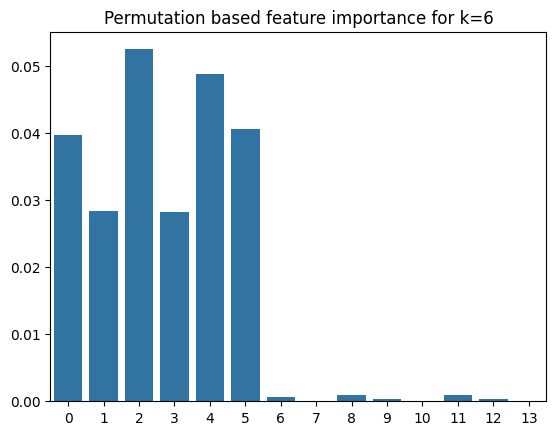

In [18]:
from sklearn.inspection import permutation_importance


result = permutation_importance(
    rf, X, y, n_repeats=10, random_state=42, n_jobs=2
)

sns.barplot(result['importances_mean'])
plt.title(f'Permutation based feature importance for k={k}')